### aim: 

### date: 

In [1]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')


In [2]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [3]:
import numpy as np
from cmocean import cm
import cartopy as cp
import cartopy.crs as ccrs
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import sys
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE')
#list of models
sys.path.append('/gpfs/home/mep22dku/scratch/SOZONE/UTILS')
import lom
import utils as ut

%matplotlib inline
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')
import cartopy.feature as cfeature
from importlib import reload
import matplotlib.path as mpath
import glob
import pickle
import pandas as pd
import seawater
import time
plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

In [4]:
ukdir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/'
cdomask = xr.open_dataset('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/wspdComponents/PlankTOMmask_krg.nc')
tmask = cdomask.aream2.mean(dim = 'time_counter')

horse = False
if horse:

    scens = ['1A','1B','2A','2B','3A','3B']
    scens = ['2A','2B']

    for scen in scens:

        for yr in range(1940,2101):
            print(f'{scen}.{yr}')
            savenam = f'{ukdir}UKESM_{scen}_y{yr}_zonal-seas.nc'
            Jan = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m01_wspd10m_daily_rg.nc')
            Janwi = Jan.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Feb = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m02_wspd10m_daily_rg.nc')
            Febwi = Feb.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Dec = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m12_wspd10m_daily_rg.nc')
            Decwi = Feb.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            DJF = np.concatenate([Janwi, Febwi, Decwi], axis = 0)
            #
            Mar = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m03_wspd10m_daily_rg.nc')
            Marwi = Mar.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Apr = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m04_wspd10m_daily_rg.nc')
            Aprwi = Apr.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            May = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m05_wspd10m_daily_rg.nc')
            Maywi = Apr.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            MAM = np.concatenate([Marwi, Aprwi, Maywi], axis = 0)
            #
            Jun = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m06_wspd10m_daily_rg.nc')
            Junwi = Jun.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Jul = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m07_wspd10m_daily_rg.nc')
            Julwi = Jul.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Aug = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m08_wspd10m_daily_rg.nc')
            Augwi = Jul.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            JJA = np.concatenate([Junwi, Julwi, Augwi], axis = 0)
            #
            Sep = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m09_wspd10m_daily_rg.nc')
            Sepwi = Sep.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Oct = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m10_wspd10m_daily_rg.nc')
            Octwi = Oct.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            Nov = xr.open_dataset(f'{ukdir}UKESM_{scen}_y{yr}m11_wspd10m_daily_rg.nc')
            Novwi = Oct.wspd10m.weighted(tmask).mean(dim = ['lon']).isel(lat = slice(0,60)).values
            SON = np.concatenate([Sepwi, Octwi, Novwi], axis = 0)

            times = pd.to_datetime([f"{yr}-01-15", f"{yr}-04-15", f"{yr}-07-15", f"{yr}-10-15"])

            seas_zonma = np.zeros([4]); seas_latma = np.zeros([4])
            seas_zonma = np.zeros([4]); seas_latma = np.zeros([4])
            seas_zonstd = np.zeros([4]); seas_latstd = np.zeros([4])
            seas_zonstd = np.zeros([4]); seas_latstd = np.zeros([4])

            cots = [DJF, MAM, JJA, SON]
            for s in range(0,4):
                testwi = cots[s]
                latma = np.zeros([90])
                zonma = np.zeros([90])

                for i in range(0,len(testwi)):
                    tday = (testwi[i,:])
                    tmax = np.nanmax(tday)
                    latind = (np.where(tday == tmax)[0][0])
                    latma[i] = Jan.lat[latind].values
                    zonma[i] = tmax
                seas_zonma[s] = np.nanmean(zonma)
                seas_latma[s] = np.nanmean(latma)
                seas_zonstd[s] = np.nanstd(zonma)
                seas_latstd[s] = np.nanstd(latma)

            data_vars = {
                'seas_zonma':(['times'], seas_zonma,
                    {'units': 'm/s',
                    'long_name':'seasonal mean zonal-maximum (from daily)'}),
                'seas_zonstd':(['times'], seas_zonstd,
                    {'units': 'm/s',
                    'long_name':'seasonal std dev of zonal-maximum (from daily)'}),

                'seas_latma':(['times'], seas_latma,
                    {'units': 'm/s',
                    'long_name':'seasonal mean latitude of zonal maximum (from daily)'}),
                'seas_latstd':(['times'], seas_latstd,
                    {'units': 'm/s',
                    'long_name':'seasonal std dev of latitude of zonal maximum (from daily)'}),

            }
            # define coordinates
            coords = {'times': (['times'], times),
            }
            # define global attributes
            attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/latitudewinds.ipynb',
            }
            ds = xr.Dataset(data_vars=data_vars,
            coords=coords,
            attrs=attrs)
            ds.to_netcdf(savenam)


In [5]:
horse = False

if horse:

    eradir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily/'


    for yr in range(1940,2023):
        print(yr)
        savenam = f'{eradir}10m_windspeed_ERA5_y{yr}_zonal-seas.nc'
        ewind = xr.open_dataset(f'{eradir}10m_windspeed_ERA5_{yr}-daily-rg.nc')
        print((f'{eradir}10m_windspeed_ERA5_{yr}-daily-rg.nc'))
        DJF = ewind.windspeed.sel(time=(ewind['time.season'] == 'DJF')).weighted(tmask).mean\
        (dim = ['lon']).isel(lat = slice(0,60)).values
        MAM = ewind.windspeed.sel(time=(ewind['time.season'] == 'MAM')).weighted(tmask).mean\
        (dim = ['lon']).isel(lat = slice(0,60)).values
        JJA = ewind.windspeed.sel(time=(ewind['time.season'] == 'JJA')).weighted(tmask).mean\
        (dim = ['lon']).isel(lat = slice(0,60)).values
        SON = ewind.windspeed.sel(time=(ewind['time.season'] == 'SON')).weighted(tmask).mean\
        (dim = ['lon']).isel(lat = slice(0,60)).values

        times = pd.to_datetime([f"{yr}-01-15", f"{yr}-04-15", f"{yr}-07-15", f"{yr}-10-15"])

        seas_zonma = np.zeros([4]); seas_latma = np.zeros([4])
        seas_zonma = np.zeros([4]); seas_latma = np.zeros([4])
        seas_zonstd = np.zeros([4]); seas_latstd = np.zeros([4])
        seas_zonstd = np.zeros([4]); seas_latstd = np.zeros([4])

        cots = [DJF, MAM, JJA, SON]
        for s in range(0,4):
            testwi = cots[s]
            nod = (len(testwi))
            latma = np.zeros([nod])
            zonma = np.zeros([nod])

            for i in range(0,nod):
                tday = (testwi[i,:])
                tmax = np.nanmax(tday)
                latind = (np.where(tday == tmax)[0][0])
                latma[i] = ewind.lat[latind].values
                zonma[i] = tmax
            seas_zonma[s] = np.nanmean(zonma)
            seas_latma[s] = np.nanmean(latma)
            seas_zonstd[s] = np.nanstd(zonma)
            seas_latstd[s] = np.nanstd(latma)
        
        print(seas_zonma)
        print(seas_latma)
        data_vars = {
            'seas_zonma':(['times'], seas_zonma,
                {'units': 'm/s',
                'long_name':'seasonal mean zonal-maximum (from daily)'}),
            'seas_zonstd':(['times'], seas_zonstd,
                {'units': 'm/s',
                'long_name':'seasonal std dev of zonal-maximum (from daily)'}),

            'seas_latma':(['times'], seas_latma,
                {'units': 'm/s',
                'long_name':'seasonal mean latitude of zonal maximum (from daily)'}),
            'seas_latstd':(['times'], seas_latstd,
                {'units': 'm/s',
                'long_name':'seasonal std dev of latitude of zonal maximum (from daily)'}),

        }
        # define coordinates
        coords = {'times': (['times'], times),
        }
        # define global attributes
        attrs = {'made in':'SOZONE/windAnalyis/wspdComponents/latitudewinds.ipynb',
        }
        ds = xr.Dataset(data_vars=data_vars,
        coords=coords,
        attrs=attrs)
        ds.to_netcdf(savenam)

In [6]:
def make_yearlist_era(yrst, yrend):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/ERA5_v202303_rawdat/daily'
        ty = f'{baseDir}/10m_windspeed_ERA5_y{yrs[i]}_zonal-seas.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

def make_yearlist_ukesm(yrst, yrend, scen = '1A'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily'
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_zonal-seas.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

eralist = make_yearlist_era(1940, 2020)
ukesmlist = make_yearlist_ukesm(1940, 2020)

In [7]:
ukesmlist

['/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1940_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1941_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1942_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1943_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1944_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1945_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1946_zonal-seas.nc',
 '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily/UKESM_1A_y1947_zonal-seas.nc',
 '/gpfs/data/greenocean/software/product

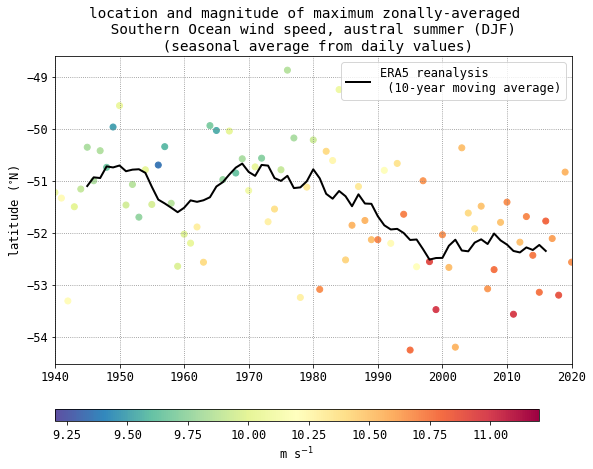

In [8]:
plt.rcParams.update({'font.size': 12})
font = {'family' : 'monospace',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

tseas = 'DJF'
eraw = xr.open_mfdataset(make_yearlist_era(1940, 2020))
ttime = eraw.sel(times=(eraw['times.season'] == tseas)).groupby('times.year').mean() 

tmov_latma = moving_average(ttime.seas_latma.values, 10)
tmov_zonma = moving_average(ttime.seas_zonma.values, 10)
tvmi = 9.2;
tvma = 11.2;

fact = 0.7
fig, axs = plt.subplots(1,1, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')

plt.title('location and magnitude of maximum zonally-averaged  \n Southern Ocean wind speed, austral summer (DJF) \n (seasonal average from daily values)')


w = axs.scatter(ttime.year, ttime.seas_latma, c = ttime.seas_zonma, cmap = 'Spectral_r', vmin = tvmi, vmax = tvma)
axs.plot(ttime.year[5:77], tmov_latma, color = 'k', linewidth = 2, label = 'ERA5 reanalysis \n (10-year moving average)')
axs.grid(linestyle = ':', color = 'grey')
axs.set_xlim([1940,2020])
axs.set_ylabel('latitude ($^{\circ}$N)')
plt.legend(loc = 'best')
cbar_ax = fig.add_axes([0.1, -0.06, .8, .03]) #left, bottom, width, height
fig.colorbar(w, cax=cbar_ax, orientation="horizontal", label = 'm s$^{-1}$')

plt.tight_layout()

plt.show()

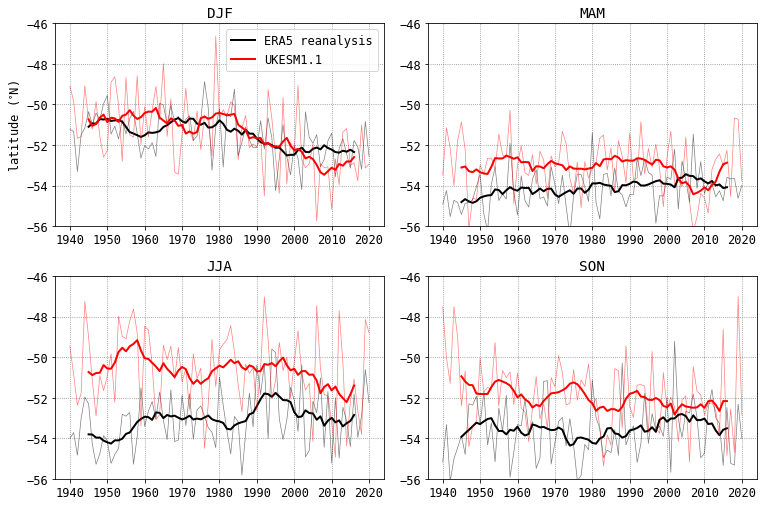

In [9]:
fact = 0.9
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

eraw= xr.open_mfdataset(make_yearlist_era(1940, 2020))
ukesmw = xr.open_mfdataset(make_yearlist_ukesm(1940, 2020))
ukesmk = 'r'; erak = 'k'
tseas = 'DJF'
seasns = ['DJF', 'MAM', 'JJA', 'SON']
for i in range(0,4):
    tseas = seasns[i]
    eratw = eraw.sel(times=(eraw['times.season'] == tseas)).groupby('times.year').mean() 
    eratw_mov_latma = moving_average(eratw.seas_latma.values, 10)

    axs[i].plot(eratw.year, eratw.seas_latma, color = erak, alpha = 0.5, linewidth = 0.7)#c = ttime.seas_zonma, cmap = 'Spectral_r', vmin = tvmi, vmax = tvma)
    axs[i].plot(eratw.year[5:77], eratw_mov_latma, color = erak, linewidth = 2, label = 'ERA5 reanalysis')


    ukesmtw = ukesmw.sel(times=(ukesmw['times.season'] == tseas)).groupby('times.year').mean() 
    ukesmtw_mov_latma = moving_average(ukesmtw.seas_latma.values, 10)

    axs[i].plot(ukesmtw.year, ukesmtw.seas_latma, color = ukesmk, alpha = 0.5, linewidth = 0.7)#c = ttime.seas_zonma, cmap = 'Spectral_r', vmin = tvmi, vmax = tvma)
    axs[i].plot(ukesmtw.year[5:77], ukesmtw_mov_latma, color = ukesmk, linewidth = 2, label = 'UKESM1.1')
    axs[0].set_ylabel('latitude ($^{\circ}$N)')
    axs[i].grid(linestyle = ':', color = 'grey')
    axs[i].set_title(tseas)
    axs[0].legend(loc = 'best')
    axs[i].set_ylim([-56,-46])
    
#plt.suptitle('location of maximum zonally-averaged Southern Ocean wind speed \n (seasonal average from daily values, 10-year moving average shown in bold)')
plt.tight_layout()
plt.show
fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/MF-lat-hist.jpg')

In [10]:
eraw

<xarray.Dataset>
Dimensions:      (times: 324)
Coordinates:
  * times        (times) datetime64[ns] 1940-01-15 1940-04-15 ... 2020-10-15
Data variables:
    seas_zonma   (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_zonstd  (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_latma   (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_latstd  (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Attributes:
    made in:  SOZONE/windAnalyis/wspdComponents/latitudewinds.ipynb

In [11]:
yr = 1940; yrend = 1980
ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = ukesmtw.seas_latma.sel(times=(ukesmtw['times.season'] == tseas)).groupby('times.year').mean().values
test2

array([-47.52222222, -50.03333333, -51.28888889, -47.51111111,
       -49.04444444, -52.41111111, -50.67777778, -54.41111111,
       -53.4       , -53.15555556, -50.05555556, -51.71111111,
       -51.48888889, -51.58888889, -49.27777778, -52.41111111,
       -50.65555556, -51.01111111, -50.73333333, -52.33333333,
       -50.78888889, -52.52222222, -52.71111111, -54.16666667,
       -52.51111111, -50.95555556, -53.05555556, -52.28888889,
       -53.5       , -51.01111111, -51.45555556, -49.92222222,
       -50.78888889, -52.35555556, -52.27777778, -50.61111111,
       -52.13333333, -51.12222222, -51.44444444, -50.33333333])

In [12]:
import pymannkendall as mk
data = np.zeros([5,6])
# test = eralist.wspd10m.sel(time_counter=slice(f'{yr}-01-01', f'{yrend}-01-01'))
# test2 = test.isel(lat = slice(0,40)).weighted(tmask.isel(lat = slice(0,40)))\
# .mean(dim = ['lat', 'lon'])\
# .sel(time_counter=(test['time_counter.season'] == tseas))\
# .groupby('time_counter.year').mean()

seas = ['DJF','MAM', 'JJA', 'SON',]

yr = 1940; yrend = 1980
ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = ukesmtw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'ukesm {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = ukesmtw.seas_latma.sel(times=(ukesmtw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'ukesm {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
#     data[i+1,0] = slope*10; data[i+1,1] = p 
print()

eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = eratw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'era {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = eratw.seas_latma.sel(times=(eratw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'era {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')

print()
print()

yr = 1980; yrend = 2020
ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = ukesmtw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'ukesm {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = ukesmtw.seas_latma.sel(times=(ukesmtw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'ukesm {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
#     data[i+1,0] = slope*10; data[i+1,1] = p 
print()

eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = eratw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'era {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = eratw.seas_latma.sel(times=(eratw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'era {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')

print()
print()

yr = 1940; yrend = 2020
ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = ukesmtw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'ukesm {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    ukesmtw = ukesmw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = ukesmtw.seas_latma.sel(times=(ukesmtw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'ukesm {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')
#     data[i+1,0] = slope*10; data[i+1,1] = p 
print()

eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
test2 = eratw.seas_latma.groupby('times.year').mean().values

trend, h, p, z, Tau, s, var_s, slope, intercept \
    = mk.original_test(test2)
print(f'era {yr}-{yrend}, full year: {trend}, slope (per year) {slope}, p {p}')
data[0,0] = slope*10; data[0,1] = p 
for i in range(0,4):
    tseas = seas[i]
    eratw = eraw.sel(times=slice(f'{yr}-01-01', f'{yrend}-01-01'))
    test2 = eratw.seas_latma.sel(times=(eratw['times.season'] == tseas)).groupby('times.year').mean().values
    trend, h, p, z, Tau, s, var_s, slope, intercept \
        = mk.original_test(test2)
    print(f'era {yr}-{yrend}, {tseas}: {trend}, slope (per year) {slope}, p {p}')

print()
print()

ukesm 1940-1980, full year: no trend, slope (per year) -0.022079678362573366, p 0.1328433096626911
ukesm 1940-1980, DJF: no trend, slope (per year) -0.01481481481481487, p 0.5215916155065023
ukesm 1940-1980, MAM: no trend, slope (per year) -0.015092097445038597, p 0.36343333033159153
ukesm 1940-1980, JJA: no trend, slope (per year) -0.028174603174603643, p 0.31631607020233554
ukesm 1940-1980, SON: no trend, slope (per year) -0.020551378446115126, p 0.45577731014783174

era 1940-1980, full year: no trend, slope (per year) 0.006852999700437876, p 0.3696497329509345
era 1940-1980, DJF: no trend, slope (per year) 0.0073028504062986254, p 0.6081749588228955
era 1940-1980, MAM: no trend, slope (per year) 0.01706139232436565, p 0.11564546532083231
era 1940-1980, JJA: no trend, slope (per year) 0.025237771739130378, p 0.12119000947028047
era 1940-1980, SON: no trend, slope (per year) -0.006160506160506301, p 0.8520883390587586


ukesm 1980-2020, full year: decreasing, slope (per year) -0.03777

## by scenario wind movement

In [13]:
tdir = f'/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily'

def make_yearlist_ukesm(yrst, yrend, scen = '1A'):
    yrs = np.arange(yrst,yrend+1,1)
    ylist = []
    for i in range(0,len(yrs)):
        baseDir = '/gpfs/data/greenocean/software/products/windsFromComponents/symlinked_hrly_UKESM/daily'
        ty = f'{baseDir}/UKESM_{scen}_y{yrs[i]}_zonal-seas.nc'
        t2 = glob.glob(ty)
        ylist.append(t2[0])
    return ylist

#eralist = make_yearlist_era(1940, 2020)
uk_1A = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100))
uk_1A = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '1A'))
uk_2A = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '2A'))
uk_3A = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '3A'))
uk_1B = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '1B'))
uk_2B = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '2B'))
uk_3B = xr.open_mfdataset(make_yearlist_ukesm(1940, 2100, '3B'))

In [14]:
scendict = {
    '1A': {
        'hist_str': 'bc370',
        'fut_str': 'be682',
        'name': 'HIST.OZONE \n LOW TEMP.',
        'name2':'1A: NatlOzone-SSP126',
        'color':'#E8D215',
        'runid':'TOM12_TJ_1AA1'},
    '1B': {
        'hist_str': 'bc370',
        'fut_str': 'ce417',
        'name': 'HIST. OZONE \n HIGH TEMP.',
        'name2':'1B: NatlOzone-SSP370',
        'color':'#87800A',
        'runid':'TOM12_TJ_1BA1'},
    '2A': {
        'hist_str': 'cj198',
        'fut_str': 'cj880',
        'name': 'FIXED OZONE \n LOW TEMP.',
        'name2':'2A: Ozone1950-SSP126',
        'color':'#2DC18E',
        'runid':'TOM12_TJ_2AA1'},
    '2B': {
        'hist_str': 'cj198',
        'fut_str': 'cj881',
        'name': 'FIXED OZONE \n HIGH TEMP.',
        'name2':'2B: Ozone1950-SSP370',
        'color':'#18765C',
        'runid':'TOM12_TJ_2BA1'},
    '3A': {
        'hist_str': 'cj200',
        'fut_str': 'cj484',
        'name': '1990 OZONE \n LOW TEMP.',
        'name2':'3A: Ozone1990-SSP126',
        'color':'#FF462B',
        'runid':'TOM12_TJ_3AA1'},
    '3B': {
        'hist_str': 'cj200',
        'fut_str': 'cj504',
        'name': '1990 OZONE \n HIGH TEMP.',
        'name2':'3B: Ozone1990-SSP370',
        'color':'#822722',
        'runid':'TOM12_TJ_3BA1'},
    'PI': {
        'hist_str': '',
        'fut_str': '',
        'name': 'PI OZONE \n PI TEMP.',
        'name2':'PI: OzonePI-PI',
        'color':'silver',
        'runid':'TOM12_TJ_PIA1'}
}


In [15]:
uk_1A

<xarray.Dataset>
Dimensions:      (times: 644)
Coordinates:
  * times        (times) datetime64[ns] 1940-01-15 1940-04-15 ... 2100-10-15
Data variables:
    seas_zonma   (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_zonstd  (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_latma   (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
    seas_latstd  (times) float64 dask.array<chunksize=(4,), meta=np.ndarray>
Attributes:
    made in:  SOZONE/windAnalyis/wspdComponents/latitudewinds.ipynb

<function matplotlib.pyplot.show(close=None, block=None)>

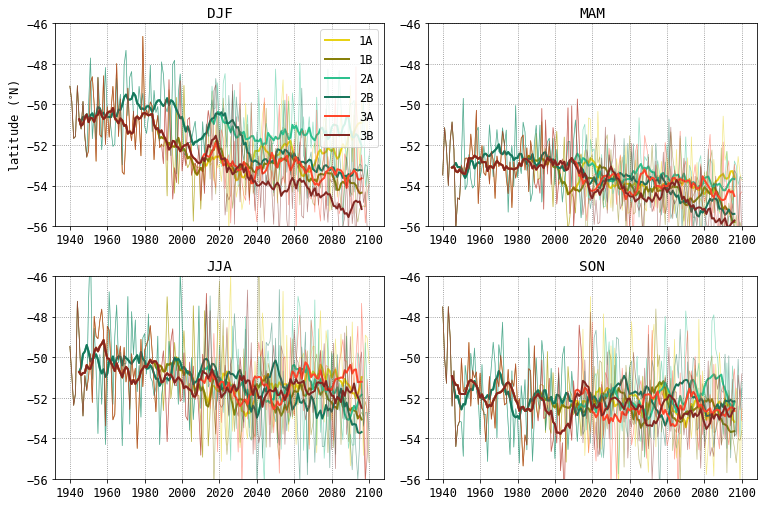

In [16]:
fact = 0.9
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens = ['1A','1B','2A','2B','3A','3B',]
tuk = [uk_1A,uk_1B,uk_2A,uk_2B,uk_3A,uk_3B,]


tseas = 'DJF'
seasns = ['DJF', 'MAM', 'JJA', 'SON']
for m in range(0,6):
    ukesmw = tuk[m]
    tsc = scens[m]
    for i in range(0,4):
        tseas = seasns[i]
        

        ukesmtw = ukesmw.sel(times=(ukesmw['times.season'] == tseas)).groupby('times.year').mean() 
        ukesmtw_mov_latma = moving_average(ukesmtw.seas_latma.values, 10)

        axs[i].plot(ukesmtw.year, ukesmtw.seas_latma, color = scendict[tsc]['color'], alpha = 0.5, linewidth = 0.7)#c = ttime.seas_zonma, cmap = 'Spectral_r', vmin = tvmi, vmax = tvma)
        axs[i].plot(ukesmtw.year[5:5+152], ukesmtw_mov_latma, color = scendict[tsc]['color'], linewidth = 2, label = f'{scens[m]}')
        axs[0].set_ylabel('latitude ($^{\circ}$N)')
        axs[i].grid(linestyle = ':', color = 'grey')
        axs[i].set_title(tseas)
        axs[0].legend(loc = 'best')
        axs[i].set_ylim([-56,-46])
    
#plt.suptitle('location of maximum zonally-averaged Southern Ocean wind speed \n (seasonal average from daily values, 10-year moving average shown in bold)')
plt.tight_layout()
plt.show

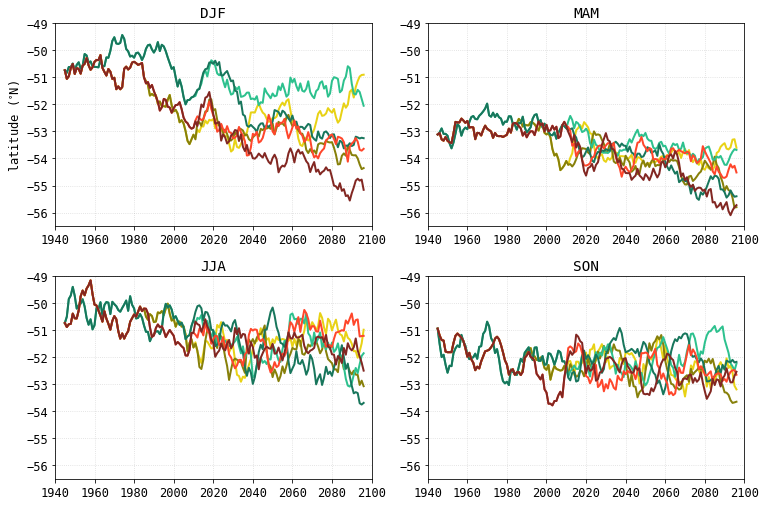

In [17]:
fact = 0.9
fig, axs = plt.subplots(2,2, figsize=(12*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()

scens = ['1A','1B','2A','2B','3A','3B',]
tuk = [uk_1A,uk_1B,uk_2A,uk_2B,uk_3A,uk_3B,]


tseas = 'DJF'
seasns = ['DJF', 'MAM', 'JJA', 'SON']
for m in range(0,6):
    ukesmw = tuk[m]
    tsc = scens[m]
    for i in range(0,4):
        tseas = seasns[i]
        

        ukesmtw = ukesmw.sel(times=(ukesmw['times.season'] == tseas)).groupby('times.year').mean() 
        ukesmtw_mov_latma = moving_average(ukesmtw.seas_latma.values, 10)

        #axs[i].plot(ukesmtw.year, ukesmtw.seas_latma, color = scendict[tsc]['color'], alpha = 0.5, linewidth = 0.7)#c = ttime.seas_zonma, cmap = 'Spectral_r', vmin = tvmi, vmax = tvma)
        axs[i].plot(ukesmtw.year[5:5+152], ukesmtw_mov_latma, color = scendict[tsc]['color'], linewidth = 2, label = f'{scens[m]}')
        axs[0].set_ylabel('latitude ($^{\circ}$N)')
        axs[i].grid(linestyle = ':', color = 'grey')
        axs[i].set_title(tseas)
#         axs[0].legend(loc = 'best')
        axs[i].set_ylim([-56.5,-49])
        axs[i].set_xlim([1940,2100])
        
for i in range(0,4):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.3)
    
#plt.suptitle('location of maximum zonally-averaged Southern Ocean wind speed \n (seasonal average from daily values, 10-year moving average shown in bold)')
plt.tight_layout()
plt.show
plt.savefig("/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-lat-fut.jpg",
               bbox_inches='tight', 
               transparent=True,
               pad_inches=0.1)

In [18]:
np.shape(ukesmtw_mov_latma)

(152,)

In [19]:
print((uk_2B.seas_zonma - uk_2A.seas_zonma).values)


[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000

In [ ]:
import warnings
from datetime import datetime
warnings.filterwarnings('ignore')

tlw = 1.5
tlw2 = 0.3 #linewidth
fact = 1.2
ypos = 1.02
fs2 = 10
var = 'wspd10m'; vardesc = 'wind speed'; ylab = 'm s$^{-1}$'

fig, axs = plt.subplots(3,5, figsize=(15*fact, 8*fact), facecolor='w', edgecolor='k')
axs = axs.ravel()


# #####
wspdset = [wspd_1A, wspd_1B, wspd_2A, wspd_2B, wspd_3A, wspd_3B]
scens = ['1A', '1B', '2A', '2B', '3A', '3B']

wspd_2A_50 = wspd_2A.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))
wspd_2B_50 = wspd_2B.sel(time_counter=slice(f'{1950}-01-01', f'{1960}-01-01'))

wspdset_o3 = [(wspd_3B-wspd_2B), (wspd_3A-wspd_2A), (wspd_1B-wspd_2B), (wspd_1A-wspd_2A)]
scens_o3 = ['1990-fixed \n (high temp.)', '1990-fixed \n (low temp.)','hist.-fixed \n (high temp.)', 'hist.-fixed \n (low temp.)']
cols_o3 = ['#822722', '#FF462B', '#87800A', '#E8D215']

#wspdset_t = [(wspd_2B-wspd_2B_50), (wspd_2A-wspd_2A_50)]
cols_t = ['dimgrey', 'silver']
scens_t = ['high temp.','low temp.']

for x in range(0,6):
    tsc = scens[x]
    wspd = wspdset[x]
    
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
      
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name2'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = 2, alpha = 1, label = scendict[tsc]['name'])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3], color = scendict[tsc]['color'], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4], color = scendict[tsc]['color'], linewidth = 2, alpha = 1)
    
#axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)

##### ozone effect
ind = 5
for x in range(0,4):
    tsc = scens_o3[x]
    wspd = wspdset_o3[x]
    tv = wspd[var].groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[0+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])    
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[1+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[1+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[2+ind], color = cols_o3[x], linewidth = tlw, alpha = 1, label = scens_o3[x])
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[2+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[3+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
    tv = wspd[var].sel(time_counter=(wspd['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()
    tv_rol = tv.rolling(year=10, center=True).mean()
    #tv.plot(ax = axs[3+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
    tv_rol.plot(ax = axs[4+ind], color = cols_o3[x], linewidth = tlw, alpha = 1)
    
#### temperature effect
ind = 10
tv = wspd_2B[var].groupby('time_counter.year').mean()-\
wspd_2B_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])
    
tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])

tv = wspd_2B[var].sel(time_counter=(wspd_2B['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2B_50[var].sel(time_counter=(wspd_2B_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[0], linewidth = tlw, alpha = 1, label = scens_t[0])    
    
tv = wspd_2A[var].groupby('time_counter.year').mean()-\
wspd_2A_50[var].mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[0+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'DJF')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'DJF')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[1+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'MAM')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'MAM')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[2+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])
    
tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'JJA')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'JJA')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[3+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])

tv = wspd_2A[var].sel(time_counter=(wspd_2A['time_counter.season'] == 'SON')).groupby('time_counter.year').mean()-\
wspd_2A_50[var].sel(time_counter=(wspd_2A_50['time_counter.season'] == 'SON')).mean().values
tv_rol = tv.rolling(year=10, center=True).mean()
#tv.plot(ax = axs[0+ind], color = cols[x], linewidth = tlw2, alpha = 0.5)
tv_rol.plot(ax = axs[4+ind], color = cols_t[1], linewidth = tlw, alpha = 1, label = scens_t[1])  
###low T

for i in range(0,15):
    axs[i].grid(color = 'grey', linestyle = ':', alpha = 0.5)
    

### effect
ymi = [8.5, 7.0, 9, 9, 8.5]
tits0 = [f'a) FY, {vardesc}',f'b) DJF, {vardesc}',f'c) MAM, {vardesc}',\
        f'd) JJA, {vardesc}',f'e) SON, {vardesc}']
for i in range(0,5):
    axs[i].set_title(tits0[i], y = ypos)
    axs[i].set_xlim([1950,2100])
    #axs[2].legend(loc = 'upper left', ncol = 2, fontsize = fs2)
    #axs[3].legend(loc = (0.06, 0.5), ncol = 2, fontsize = 10)
    #axs[3].legend(bbox_to_anchor = (1,1), ncol = 2, fontsize = 10)
    axs[i].set_ylim([ymi[i], ymi[i]+2.5])
    axs[i].set_xlabel('')
    
tits = ['f) FY, ozone effect', 'g) DJF, ozone effect','h) MAM, ozone effect',\
        'i) JJA, ozone effect','j) SON, ozone effect']
ind = 5; ymi = -0.35; yma = 1.15
for i in range(0+ind,5+ind):
    axs[i].set_title(tits[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    axs[2+ind].legend(loc = 'upper right', ncol = 2, fontsize = fs2-2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    axs[i].set_xlabel('')
    
ind = 10; ymi = -0.4; yma = 1.1
tits1 = ['k) FY, temp. effect', 'l) DJF, temp. effect','m) MAM, temp. effect',\
        'n) JJA, temp. effect','o) SON, temp. effect']
for i in range(0+ind,5+ind):
    
    axs[i].set_title(tits1[i-ind], y = ypos)
    axs[i].set_xlim([1950,2100])
    axs[1+ind].legend(loc = 'upper left', fontsize = fs2)
    axs[i].set_ylim([ymi,yma])
    axs[i].axhline(y=0, color = 'grey', linestyle = ':')
    
axs[0].set_ylabel(f'{ylab}')
axs[5].set_ylabel(f'{ylab}')
axs[10].set_ylabel(f'{ylab}')
    
    
    
tsp = 0.24
plt.subplots_adjust(wspace=tsp, hspace=tsp+0.05)
#plt.tight_layout()
##fig.savefig('/gpfs/home/mep22dku/scratch/SOZONE/windAnalyis/paperJPG/Fig-windlines.jpg')
# plt.savefig("./figs/Fig-wspdcombined.jpg",
#                bbox_inches='tight', 
#                transparent=True,
#                pad_inches=0.1)